In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/jupyterNotebook/DeepLearning/dogs-vs-cats"

In [ ]:
import cv2
from pathlib import Path

In [ ]:
import os
from pathlib import Path

In [ ]:
test_path="/content/drive/MyDrive/jupyterNotebook/DeepLearning/dogs-vs-cats/test"
train_path="/content/drive/MyDrive/jupyterNotebook/DeepLearning/dogs-vs-cats/train"

In [ ]:
import os
os.chdir(test_path)#used to set the directory
print(os.getcwd())#used to get the current directory


/content/drive/MyDrive/jupyterNotebook/DeepLearning/dogs-vs-cats/test


In [ ]:
#how to list all the sub-directories
list1=os.listdir()
print(list1)

['cats', 'dogs']


In [ ]:
test_path_with_cats=os.path.join(test_path,'cats')
os.chdir(test_path_with_cats)

In [ ]:
print(os.getcwd())

/content/drive/MyDrive/jupyterNotebook/DeepLearning/dogs-vs-cats/test/cats


In [ ]:
cat_img_list=os.listdir()

In [ ]:

import matplotlib.pyplot as plt

print(cat_img_list)

['cat.7889.jpg', 'cat.8519.jpg', 'cat.8030.jpg', 'cat.8505.jpg', 'cat.5572.jpg', 'cat.6375.jpg', 'cat.8048.jpg', 'cat.8564.jpg', 'cat.7221.jpg', 'cat.8049.jpg', 'cat.5648.jpg', 'cat.6875.jpg', 'cat.614.jpg', 'cat.7775.jpg', 'cat.7682.jpg', 'cat.7835.jpg', 'cat.8477.jpg', 'cat.6248.jpg', 'cat.8209.jpg', 'cat.561.jpg', 'cat.6890.jpg', 'cat.6215.jpg', 'cat.5768.jpg', 'cat.7807.jpg', 'cat.621.jpg', 'cat.7083.jpg', 'cat.6816.jpg', 'cat.7204.jpg', 'cat.6155.jpg', 'cat.6295.jpg', 'cat.7045.jpg', 'cat.7145.jpg', 'cat.6076.jpg', 'cat.639.jpg', 'cat.7487.jpg', 'cat.6828.jpg', 'cat.8310.jpg', 'cat.7372.jpg', 'cat.7177.jpg', 'cat.7264.jpg', 'cat.6588.jpg', 'cat.5626.jpg', 'cat.6963.jpg', 'cat.5614.jpg', 'cat.6996.jpg', 'cat.6539.jpg', 'cat.6127.jpg', 'cat.8180.jpg', 'cat.7925.jpg', 'cat.7798.jpg', 'cat.8162.jpg', 'cat.7987.jpg', 'cat.5921.jpg', 'cat.6500.jpg', 'cat.7909.jpg', 'cat.7096.jpg', 'cat.6792.jpg', 'cat.6953.jpg', 'cat.848.jpg', 'cat.6507.jpg', 'cat.8436.jpg', 'cat.5969.jpg', 'cat.6105.jp

In [ ]:
final_path_cat=os.path.join(test_path_with_cats,cat_img_list[0])

img=cv2.imread(final_path_cat)
cat_list=[]
list1.append(img)

In [ ]:
for i in range(len(cat_img_list)):
  final_path_cat=os.path.join(test_path_with_cats,cat_img_list[i])
  img=cv2.imread(final_path_cat)
  new_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  cat_list.append(new_img)


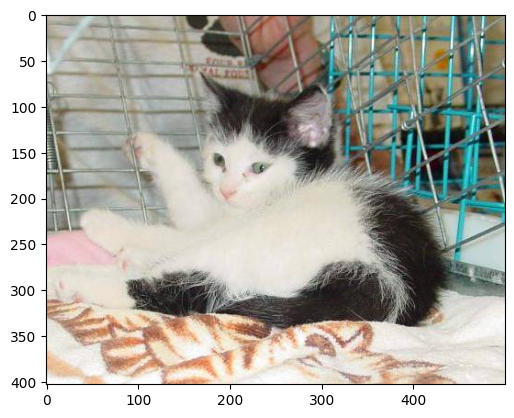

In [ ]:
plt.imshow(cat_list[4])

In [ ]:
test_path_with_dogs=os.path.join(test_path,'dogs')
os.chdir(test_path_with_dogs)

In [ ]:
dogs_img_list=os.listdir()

In [ ]:
final_path_dogs=os.path.join(test_path_with_dogs,dogs_img_list[0])

img=cv2.imread(final_path_dogs)
dogs_list=[]
dogs_list.append(img)

In [ ]:
for i in range(len(dogs_img_list)):
  final_path_dogs=os.path.join(test_path_with_dogs,dogs_img_list[i])
  img=cv2.imread(final_path_dogs)
  new_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  dogs_list.append(new_img)


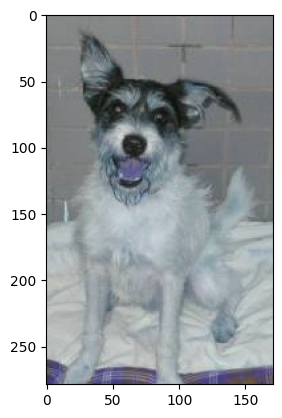

In [ ]:
new_img=cv2.cvtColor(dogs_list[2],cv2.COLOR_BGR2RGB)
plt.imshow(new_img)

In [ ]:
import numpy as np

X_train=dogs_list[0:int(np.floor(len(dogs_list)*0.8))]
#X_test=dogs_list[abs((len(dogs_list)*0.8))+1:len(dogs_list)]
print(len(X_train))

2000


In [ ]:
#dogs photos as dataset


import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv2D, Conv2DTranspose, MaxPooling2D,
    BatchNormalization, Activation, Concatenate, Resizing)
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

def conv_block(input, num_filters):
    x = Conv2D(num_filters, (3, 3), padding='same')(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(num_filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def encoder_block(input, num_filters):
    s = conv_block(input, num_filters)
    p = MaxPooling2D((2, 2))(s)
    return s, p

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input)

    # Resizing to match skip_features' shape
    target_height = int(skip_features.shape[1])
    target_width = int(skip_features.shape[2])
    x_resized = Resizing(target_height, target_width)(x)

    x = Concatenate()([x_resized, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    # Bridge
    b = conv_block(p4, 1024)

    # Decoder
    d1 = decoder_block(b, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    # Output
    outputs = Conv2D(3, (1, 1), activation='sigmoid')(d4)

    return Model(inputs, outputs)
desired_height, desired_width = 128, 128
def resize_and_normalize(images):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, (desired_width, desired_height))
        resized_images.append(resized_img)
    return np.array(resized_images, dtype='float32') / 255.0

#cat_array = resize_and_normalize(cat_list)
dog_array = resize_and_normalize(dogs_list)

X_train = np.array(dog_array[0:int(np.floor(len(dog_array) * 0.8))])
X_test = np.array(dog_array[int(np.floor(len(dog_array) * 0.8)) + 1:])



#X_train = np.expand_dims(X_train, axis=-1)
#X_test = np.expand_dims(X_test, axis=-1)

# Add noise
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)




X_train_noisy.shape (128, 128, 3)
X_train.shape (128, 128, 3)


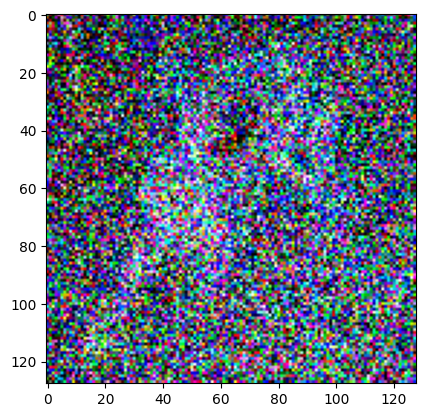

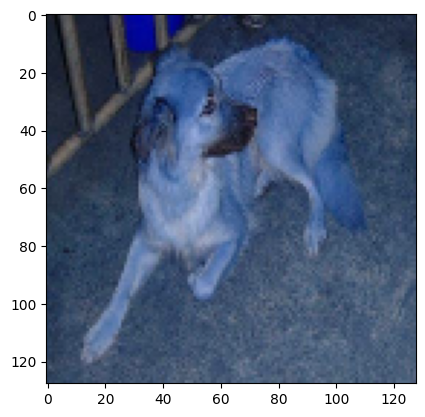

In [ ]:
print("X_train_noisy.shape",X_train_noisy[4].shape)
print("X_train.shape",X_train[4].shape)
plt.imshow(X_train_noisy[0])
plt.show()
plt.imshow(X_train[0])
plt.show()

In [ ]:
# Build and train the model
input_shape = (desired_height, desired_width, 3)  #1->3
model = build_unet(input_shape)
model.compile(optimizer=Adam(), loss='mse', metrics=['accuracy'])
model.fit(X_train_noisy, X_train, epochs=10)


Epoch 1/10
25/63 ━━━━━━━━━━━━━━━━━━━━ 46:55 74s/step - accuracy: 0.4626 - loss: 0.0330

KeyboardInterrupt: 

In [ ]:
y_pred=model.predict(X_test_noisy)

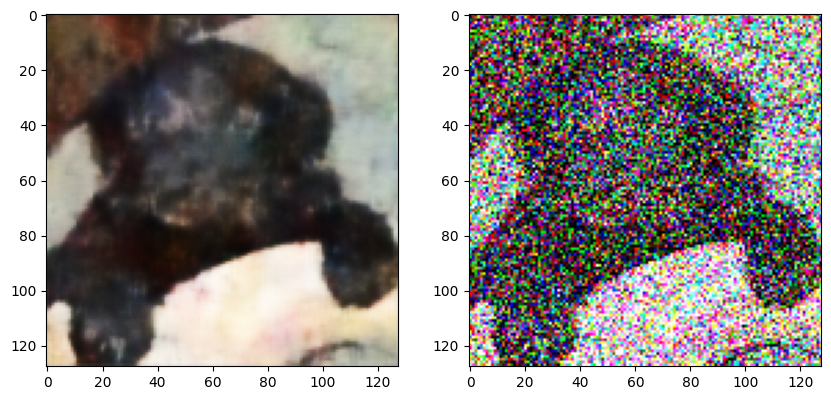

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.imshow(y_pred[7])
plt.subplot(1,2,2)

plt.imshow(X_test_noisy[7])

In [ ]:
pred2=model.predict(X_test_noisy[0].reshape(1,128,128,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


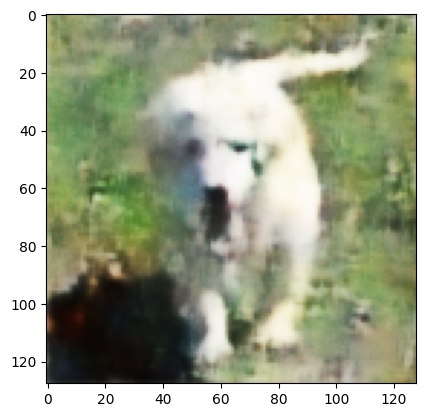

In [ ]:
plt.imshow(pred2.reshape(128,128,3))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout


from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size=16


In [ ]:
keras.utils.image_dataset_from_directory(
    directory=train_path,
    labels='inferred',
    label_mode='int',  #cat->0 and dogs->1
    batch_size=32,
    image_size=(150,150)
)

Found 13037 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

print(test_datagen)


In [ ]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'

)

validation_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'

)
print(train_generator.class_indices)

Found 13037 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


In [ ]:

class_counts = train_generator.classes
unique, counts = np.unique(class_counts, return_counts=True)
class_counts_dict = dict(zip(unique, counts))

for class_name, index in train_generator.class_indices.items():
    print(f"{class_name}: {class_counts_dict[index]} images")

cats: 3037 images
dogs: 10000 images


In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: 2.1463615409944024, 1: 0.65185}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=200 // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=800 // batch_size,
    class_weight=class_weights
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 148s 9s/step - accuracy: 0.5997 - loss: 0.8774 - val_accuracy: 0.5312 - val_loss: 0.6914
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 80s 7s/step - accuracy: 0.6040 - loss: 0.6434 - val_accuracy: 0.4888 - val_loss: 0.6965
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 76s 7s/step - accuracy: 0.5326 - loss: 0.8169 - val_accuracy: 0.4900 - val_loss: 0.6939
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 74s 7s/step - accuracy: 0.3935 - loss: 0.6389 - val_accuracy: 0.5150 - val_loss: 0.6915
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 73s 7s/step - accuracy: 0.5749 - loss: 0.7118 - val_accuracy: 0.5875 - val_loss: 0.6912
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step - accuracy: 0.4881 - loss: 0.7359 - val_accuracy: 0.5063 - val_loss: 0.6919
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step - accuracy: 0.3375 - loss: 0.7235 - val_accuracy: 0.5600 - val_loss: 0.6913
Epoch 8/10


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 7s/step - accuracy: 0.5921 - loss: 0.6365 - val_accuracy: 0.5375 - val_loss: 0.6953
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 76s 7s/step - accuracy: 0.7513 - loss: 0.7089 - val_accuracy: 0.5638 - val_loss: 0.6907
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 70s 6s/step - accuracy: 0.5466 - loss: 0.6869 - val_accuracy: 0.4913 - val_loss: 0.7043


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


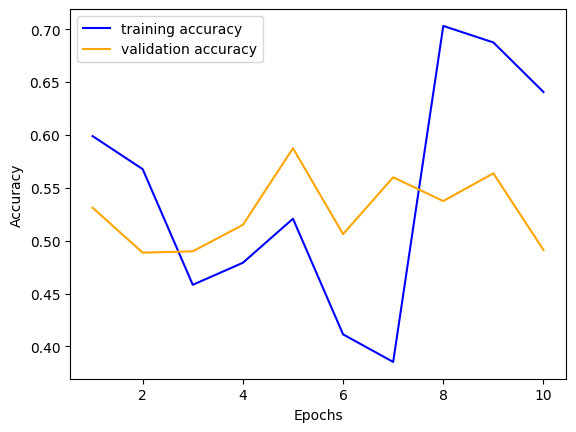

In [ ]:

print(history.history.keys())


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)


plt.plot(epochs, train_accuracy, color='blue', label="training accuracy")
plt.plot(epochs, val_accuracy, color='orange', label='validation accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
#plt.legend("upercenter",(0.5,0.5))
plt.show()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


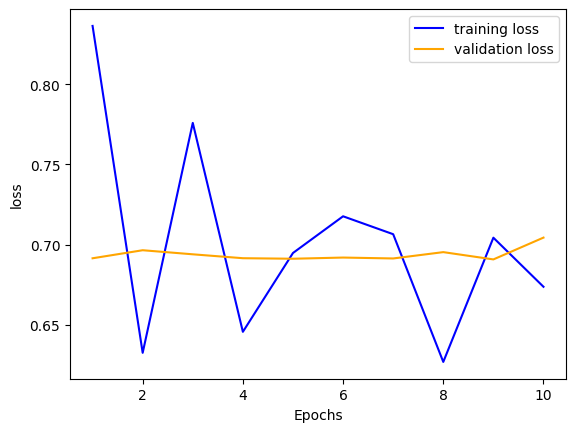

In [ ]:

print(history.history.keys())


train_accuracy = history.history['loss']
val_accuracy = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)


plt.plot(epochs, train_accuracy, color='blue', label="training loss")
plt.plot(epochs, val_accuracy, color='orange', label='validation loss')

plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
#plt.legend("upercenter",(0.5,0.5))
plt.show()


In [ ]:
import random
final_test_path="/content/drive/MyDrive/jupyterNotebook/DeepLearning/archive (3)/animals"
os.chdir(final_test_path)
data=[]
categories=os.listdir()
for i in categories:
  print(i)
  folder_path=os.path.join(os.getcwd(),i)
  if i=='cat':
    label=0
  else:
    label=1
  for j in os.listdir(folder_path):
    img_path=os.path.join(folder_path,j)
    img=cv2.imread(img_path)
    img=cv2.resize(img,(150,150))
    data.append([img,label])



random.shuffle(data)
final_X_test=[]
final_y_test=[]
for i in data:
  final_X_test.append(i[0])
  final_y_test.append(i[1])





dog
cat


In [ ]:
final_test_path="/content/drive/MyDrive/jupyterNotebook/DeepLearning/archive (3)/animals"
os.listdir()
print(final_y_test)
print(categories)



"""
print(type(f1_pred))
count_1=np.sum(f1_pred==1)
print(count_1)
count_0=np.sum(f1_pred==0)
print(count_0)

"""

[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 

'\nprint(type(f1_pred))\ncount_1=np.sum(f1_pred==1)\nprint(count_1)\ncount_0=np.sum(f1_pred==0)\nprint(count_0)\n\n'

In [ ]:
final_X_test=np.array(final_X_test)
final_y_test=np.array(final_y_test)
f1_pred=model.predict(final_X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 366ms/step


In [ ]:
print(f1_pred)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
BDOG_Path="/content/drive/MyDrive/jupyterNotebook/DeepLearning/BDOG.jpg"

BDOG_img=cv2.imread(BDOG_Path)

In [ ]:
print(BDOG_img.shape)

(148, 148, 3)


In [ ]:
test_dog=cv2.resize(BDOG_img,(150,150))

test_dog=test_dog.reshape(1,150,150,3)

In [ ]:
y_predCNN=model.predict(test_dog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
print(f1_pred[45])

[1.]


In [ ]:
#predicted_labels=(f1_pred>0.5).astype(int).flatten()


#true_labels = np.array(final_y_test).flatten()

In [ ]:
conf_metix=confusion_matrix(final_y_test,f1_pred)
print(conf_metix)

[[  0 500]
 [  0 510]]


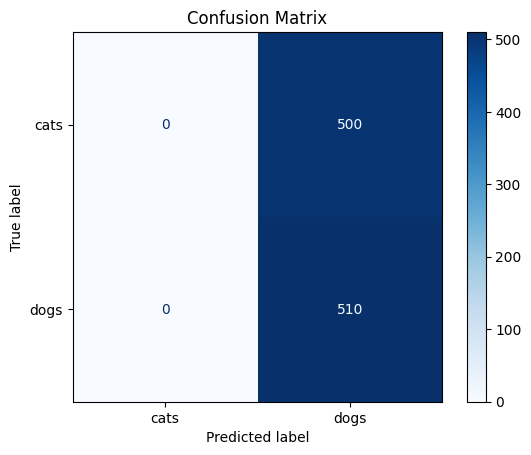

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_metix, display_labels=['cats', 'dogs'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()